In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

bdata=pd.read_csv("BankDatset.csv")

#https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python/notebook


In [2]:
d1 = {'yes': 1, 'no': 0}
bdata['loan'] = bdata['loan'].map(d1)
bdata['default'] = bdata['default'].map(d1)
bdata['housing'] = bdata['housing'].map(d1)
d2={'married':0,'divorced':1,'single':2}
bdata['marital'] = bdata['marital'].map(d2)
d3 = {'unknown':0,'primary':1,'secondary':2,'tertiary':3 }
bdata['education'] = bdata['education'].map(d3)
d4 = {'unknown':0,'telephone':1,'cellular':2}
bdata['contact'] = bdata['contact'].map(d4)
d5={'unknown':0,'other':1,'failure':2,'success':3}
bdata['poutcome'] = bdata['poutcome'].map(d5)
d6={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
bdata['month'] = bdata['month'].map(d6)
d7 = {'admin':12, 'unknown':1, 'management':2,'housemaid':3,'entrepreneur':4,'student':5,'blue-collar':6,'self-employed':7,'retired':8,'technician':9,'services':10,'unemployed':11}
bdata['job'] = bdata['job'].map(d7)

bdata.replace([np.inf, -np.inf], np.nan, inplace=True)
bdata.fillna(999, inplace=True)


In [3]:
features = ['age', 'job', 'marital', 'education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
target=['y']
X = bdata[features]
y = bdata['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [4]:
nv = GaussianNB()
nv.fit(X_train, y_train)
print(X_test)
y_pred = nv.predict(X_test)
#for i in range(len(X_test)):
   



      age    job  marital  education  default  balance  housing  loan  \
2072   44    2.0        2          3        0    -1313        1     1   
4301   49    6.0        0          1        0      371        1     0   
867    33    6.0        1          1        0      636        1     0   
2532   48   11.0        1          2        0     1266        1     0   
707    55    8.0        0          1        0     8894        0     0   
...   ...    ...      ...        ...      ...      ...      ...   ...   
1347   29    7.0        0          3        0      751        1     0   
1863   32  999.0        2          2        0       45        1     1   
924    45    3.0        0          1        0     7353        0     0   
174    42    2.0        0          3        0     9009        0     0   
4029   37    7.0        0          2        0      487        0     1   

      contact  day  month  duration  campaign  pdays  previous  poutcome  
2072        2   15      5       104        10   

In [5]:
print(accuracy_score(y_test,y_pred))
null_accuracy = (1206/(1206+151))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

0.8209944751381215
Null accuracy score: 0.8887


In [6]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[687 109]
 [ 53  56]]

True Positives(TP) =  687

True Negatives(TN) =  56

False Positives(FP) =  109

False Negatives(FN) =  53


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.86      0.89       796
         yes       0.34      0.51      0.41       109

    accuracy                           0.82       905
   macro avg       0.63      0.69      0.65       905
weighted avg       0.86      0.82      0.84       905



In [8]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8210


In [9]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1790


In [10]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8631


In [11]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9284


In [12]:
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score : {0:0.4f}'.format(f1_score))

F1 Score : 0.8945


In [13]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9284


In [14]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.6606


In [15]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.3394


In [16]:
scores = cross_val_score(nv, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.82044199 0.83425414 0.86740331 0.82596685 0.80939227 0.8121547
 0.83102493 0.84210526 0.8365651  0.80886427]
Average cross-validation score: 0.8288


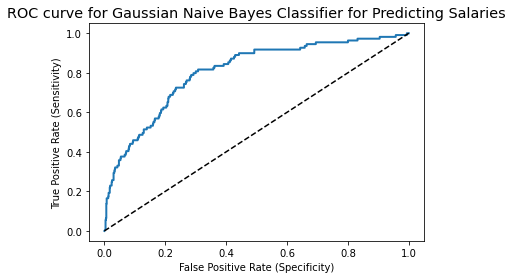

In [17]:
y_pred1 = nv.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'yes')

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()